
# CallBack
학습하는 도중 로그 출력이나 모델저장 등 다양한 액션 가능

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 로스 실시간 출력

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback


class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)  # 출력된 화면 지우고 새로그리기 위함
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])


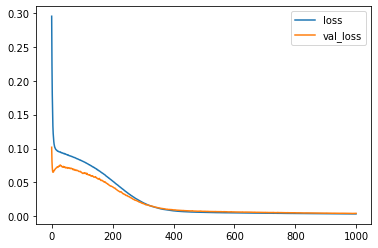

loss =  0.0035549530293792486 , val_loss =  0.004405435174703598


In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

plot_losses = PlotLosses()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses])


## 모델 저장 - ModelCheckpoint

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])



# 모델 선택. h5파일로 저장
from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[model_check_point])

## 학습율 조정 - ReduceLROnPlateau
학습 과정을 모니터링 하면서 진척되지 않으면 학습율 조정

0.2보다 떨어지지않으면 반복 (단, 0.00001보단 커야함)

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])



from tensorflow.keras.callbacks import ReduceLROnPlateau


reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              patience=25,        # 대상 기간동안 유지
                              factor=0.2,         # 줄이는 양                              
                              min_learning_rate=0.00001)     # 최소 학습율

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[reduce_lr])

## 학습율 조정 - LearningRateScheduler
학습량이 100이되면 lr 줄임

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


def scheduler(epoch, lr):
  if epoch == 100:
    lr = lr*0.1
    print("learning rate changed at epcoh {} as {}".format(epoch, lr))
  return lr

from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(scheduler)

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[lr_scheduler])


learning rate changed at epcoh 100 as 0.0009999999776482583


## 위의 방법 모두 적용

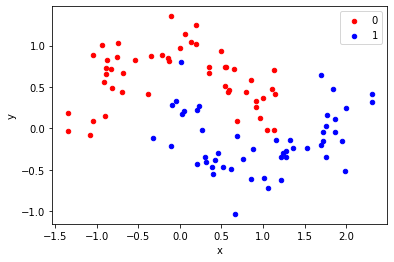

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

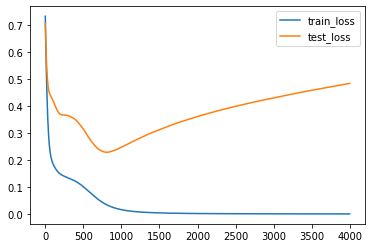

In [ ]:
# copy from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

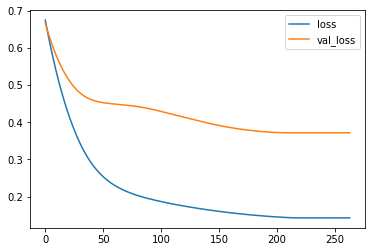

loss =  0.1423616111278534 , val_loss =  0.3715165853500366
Epoch 00264: early stopping


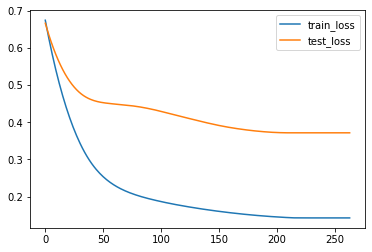

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()
